# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# Importing Data

In [3]:
# Assign the path variable 

path = r'C:\Users\guest23455\Desktop\CareerFoundry\Data Immersion\Achievement 6_Advanced Analytics and Dashboard Design\06-2023 Apartment Rental in Germany Analysis'

In [4]:
# Import the cleaned immo data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned3_immodata.csv'), index_col = False)

In [5]:
df.shape

(7811, 25)

In [6]:
df.head()

,Unnamed: 0,State,Service_Charge,Newly_Constructed,Balcony,Picture_Count,Price_Trend,Total_Rent,Year_Constructed,Number of Parking Spaces,...,Pets_Allowed,Lift,Zipcode,Number of Rooms,Floor,Number of Floors,Has_Garden,City,Districts,Heating_Costs
0,0,Nordrhein-Westfalen,215.0,True,True,12,3.76,1320.65,2018,1.0,...,negotiable,True,44229,3.0,0.0,4.0,False,Dortmund,Kirchhörde,43.05
1,1,Niedersachsen,290.0,False,True,35,2.35,1878.48,2013,1.0,...,negotiable,True,37073,5.0,1.0,4.0,False,Göttingen_Kreis,Göttingen,160.00
2,2,Schleswig-Holstein,140.0,False,True,15,5.00,1450.00,1978,2.0,...,negotiable,False,24539,4.0,0.0,2.0,True,Neumünster,Wittorf,160.00
3,3,Hessen,155.0,False,True,16,3.46,635.00,1967,1.0,...,negotiable,True,34125,1.0,10.0,10.0,False,Kassel,Wesertor,72.00
4,4,Hessen,137.0,False,False,11,3.16,467.00,1967,1.0,...,negotiable,True,34117,1.0,1.0,10.0,False,Kassel,Wesertor,60.00


In [7]:
del df['Unnamed: 0']

In [8]:
df.head()

,State,Service_Charge,Newly_Constructed,Balcony,Picture_Count,Price_Trend,Total_Rent,Year_Constructed,Number of Parking Spaces,Has_Kitchen,...,Pets_Allowed,Lift,Zipcode,Number of Rooms,Floor,Number of Floors,Has_Garden,City,Districts,Heating_Costs
0,Nordrhein-Westfalen,215.0,True,True,12,3.76,1320.65,2018,1.0,False,...,negotiable,True,44229,3.0,0.0,4.0,False,Dortmund,Kirchhörde,43.05
1,Niedersachsen,290.0,False,True,35,2.35,1878.48,2013,1.0,False,...,negotiable,True,37073,5.0,1.0,4.0,False,Göttingen_Kreis,Göttingen,160.00
2,Schleswig-Holstein,140.0,False,True,15,5.00,1450.00,1978,2.0,False,...,negotiable,False,24539,4.0,0.0,2.0,True,Neumünster,Wittorf,160.00
3,Hessen,155.0,False,True,16,3.46,635.00,1967,1.0,False,...,negotiable,True,34125,1.0,10.0,10.0,False,Kassel,Wesertor,72.00
4,Hessen,137.0,False,False,11,3.16,467.00,1967,1.0,False,...,negotiable,True,34117,1.0,1.0,10.0,False,Kassel,Wesertor,60.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     7811 non-null   object 
 1   Service_Charge            7811 non-null   float64
 2   Newly_Constructed         7811 non-null   bool   
 3   Balcony                   7811 non-null   bool   
 4   Picture_Count             7811 non-null   int64  
 5   Price_Trend               7811 non-null   float64
 6   Total_Rent                7811 non-null   float64
 7   Year_Constructed          7811 non-null   int64  
 8   Number of Parking Spaces  7811 non-null   float64
 9   Has_Kitchen               7811 non-null   bool   
 10  geo_bln                   7811 non-null   object 
 11  Cellar                    7811 non-null   bool   
 12  Base_Rent                 7811 non-null   float64
 13  Area (m2)                 7811 non-null   float64
 14  Pets_All

In [10]:
df.columns

Index(['State', 'Service_Charge', 'Newly_Constructed', 'Balcony',
       'Picture_Count', 'Price_Trend', 'Total_Rent', 'Year_Constructed',
       'Number of Parking Spaces', 'Has_Kitchen', 'geo_bln', 'Cellar',
       'Base_Rent', 'Area (m2)', 'Pets_Allowed', 'Lift', 'Zipcode',
       'Number of Rooms', 'Floor', 'Number of Floors', 'Has_Garden', 'City',
       'Districts', 'Heating_Costs'],
      dtype='object')

In [11]:
df.describe()

,Service_Charge,Picture_Count,Price_Trend,Total_Rent,Year_Constructed,Number of Parking Spaces,Base_Rent,Area (m2),Zipcode,Number of Rooms,Floor,Number of Floors,Heating_Costs
count,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000
mean,129.365631,11.247600,3.577350,905.555079,1979.572910,1.646524,711.372225,78.519205,39542.439124,2.800333,1.858533,3.317117,86.080161
std,71.809035,7.341279,1.993256,547.081127,38.555923,4.608947,478.462109,30.155329,26110.460196,3.145567,1.540269,1.711732,252.445644
min,0.000000,0.000000,-5.170000,0.000000,1300.000000,0.000000,6.000000,0.000000,1067.000000,1.000000,-1.000000,0.000000,0.000000
25%,80.000000,7.000000,2.270000,536.580000,1964.000000,1.000000,380.000000,59.000000,16823.500000,2.000000,1.000000,2.000000,56.635000
50%,112.000000,10.000000,3.510000,770.000000,1989.000000,1.000000,585.000000,74.000000,39444.000000,3.000000,2.000000,3.000000,76.790000
75%,160.000000,14.000000,4.650000,1121.070000,2012.000000,1.000000,900.000000,92.650000,55488.500000,3.000000,3.000000,4.000000,100.000000
max,863.300000,75.000000,12.220000,8550.000000,2020.000000,80.000000,7850.000000,317.000000,99994.000000,230.000000,20.000000,27.000000,12613.000000


In [12]:
pd.set_option('display.max_columns', None)

df[df['Service_Charge'] > 10000]

df = df[df['Area (m2)'] < 500] 

df = df[df['Service_Charge'] < 10000]

df.shape

df.describe()

df.to_csv(os.path.join(path,'Data','Prepared Data','cleaned3_immodata.csv'))

# The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
# Prepare the dataset
# Only numerical variables

df1 = df[['Service_Charge', 'Price_Trend', 'Total_Rent', 'Year_Constructed', 'Base_Rent', 'Area (m2)',  'Number of Rooms', 'Heating_Costs']]

In [17]:
df1.head()

,Service_Charge,Price_Trend,Total_Rent,Year_Constructed,Base_Rent,Area (m2),Number of Rooms,Heating_Costs
0,215.0,3.76,1320.65,2018,972.60,87.00,3.0,43.05
1,290.0,2.35,1878.48,2013,1343.48,127.95,5.0,160.00
2,140.0,5.00,1450.00,1978,1150.00,160.00,4.0,160.00
3,155.0,3.46,635.00,1967,480.00,43.00,1.0,72.00
4,137.0,3.16,467.00,1967,330.00,27.50,1.0,60.00


In [18]:
df1.shape

(7811, 8)

In [19]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\guest23455\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guest23455\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guest23455\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guest23455\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guest23455\Anaconda3\lib\si

[-4682242304.922318,
 -2255738299.0062227,
 -1513810405.3096642,
 -1054429110.8851657,
 -705781967.0111717,
 -519666300.3756575,
 -401301957.8543892,
 -329100836.1035607,
 -276517528.21901226]

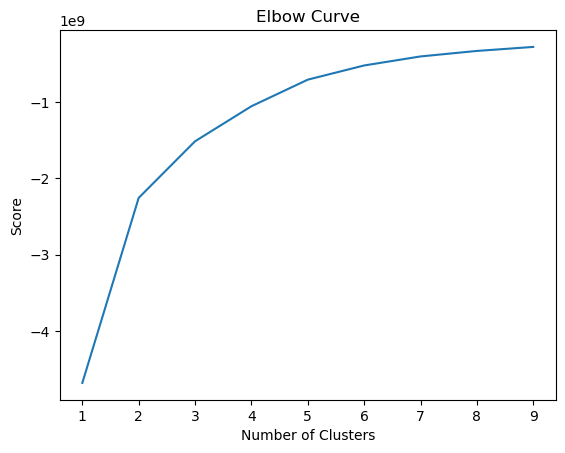

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a significant jump from two to three on the x-axis, and after that , the curve stratightens out. This means that the optimal count for the clusters is three. 

# K-means clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [22]:
# Fit the k-means object to the data.

kmeans.fit(df1)

C:\Users\guest23455\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\guest23455\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guest23455\AppData\Local\Temp\ipykernel_11924\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [24]:
df1.head()

,Service_Charge,Price_Trend,Total_Rent,Year_Constructed,Base_Rent,Area (m2),Number of Rooms,Heating_Costs,clusters
0,215.0,3.76,1320.65,2018,972.60,87.00,3.0,43.05,0
1,290.0,2.35,1878.48,2013,1343.48,127.95,5.0,160.00,0
2,140.0,5.00,1450.00,1978,1150.00,160.00,4.0,160.00,0
3,155.0,3.46,635.00,1967,480.00,43.00,1.0,72.00,2
4,137.0,3.16,467.00,1967,330.00,27.50,1.0,60.00,2


In [25]:
df1['clusters'].value_counts()

2    4884
0    2499
1     428
Name: clusters, dtype: int64

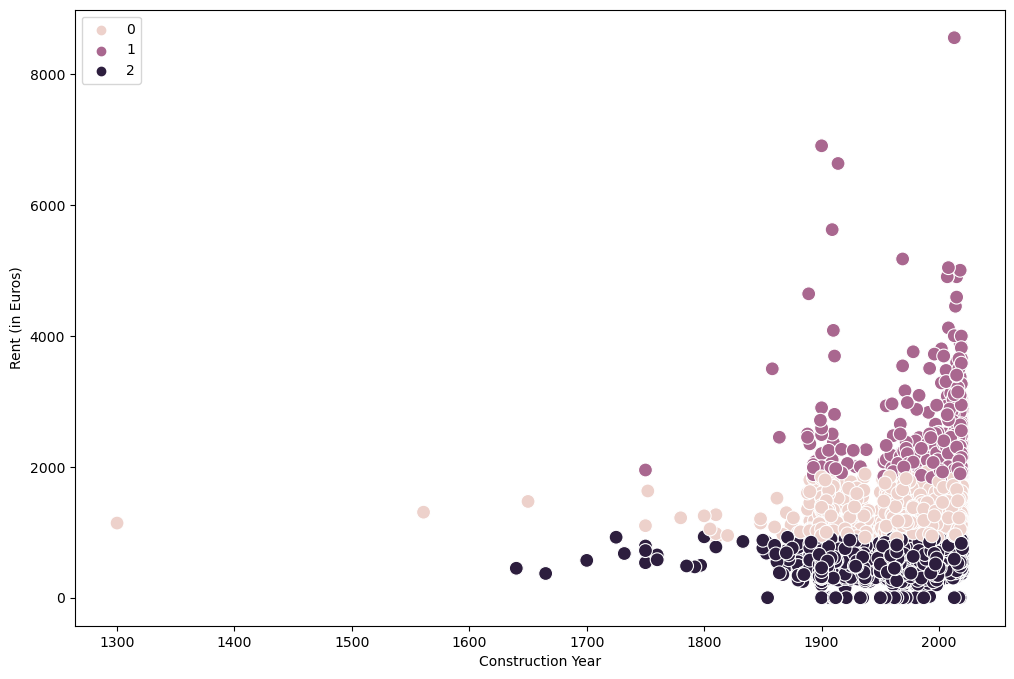

In [26]:
# Plot the clusters for the "Year_Constructed" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Year_Constructed'], y=df1['Total_Rent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Construction Year') # Label x-axis.
plt.ylabel('Rent (in Euros)') # Label y-axis.
#plt.ylim(200, 4000)
plt.show()

Dark purple represents the oldest aprtments with low rent. </br>
Pink represents the not so old apartments with above average rent. </br>
Purple represents the newest building with high rent.

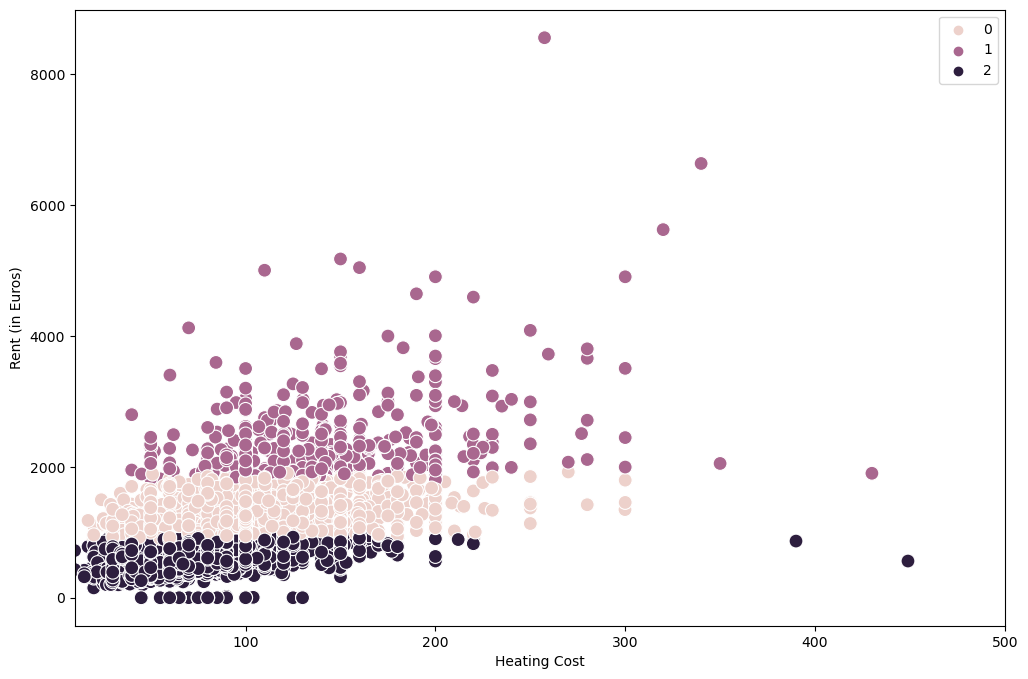

In [28]:
# Plot the clusters for the "Heating_Costs" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Heating_Costs'], y=df1['Total_Rent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Heating Cost') # Label x-axis.
plt.ylabel('Rent (in Euros)') # Label y-axis.
plt.xlim(10, 500)
plt.show()

We can clearly see that the heating costs of all apartments are some what similar, only the rent among the apartments is different. 

In [29]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\guest23455\AppData\Local\Temp\ipykernel_11924\2078207149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'


In [30]:
df1.groupby('cluster').agg({'Service_Charge':['mean', 'median'], 
                            'Total_Rent':['mean', 'median'], 
                            'Heating_Costs':['mean', 'median'],
                            'Base_Rent':['mean', 'median']})

Service_Charge          Total_Rent         Heating_Costs          \
                      mean median         mean  median          mean  median   
cluster                                                                        
dark purple     103.708561   95.0   593.808671   588.0     69.045921   70.00   
pink            157.176186  150.0  1251.033798  1200.0    110.946050   90.00   
purple          259.764112  241.0  2445.784369  2240.0    135.274953  134.16   

               Base_Rent          
                    mean  median  
cluster                           
dark purple   440.592580   420.0  
pink         1009.396567   960.0  
purple       2061.196893  1880.0

The apartments in the dark purple cluster are the most affordable apartments, because all of the values- service charge, total rent, base rent, and heating costs are less compared to the other two clusters. </br>

The apartments in the purple cluster are the most expensive apartments, because all of the values are very high compared to the other two clusters. </br>

The apartments represented by the pink cluster are mid range apartments. 

These clusters can help understand further if rent prices are really dependent on the year of construction.

It will also be useful to analyse the expensive and affordable cities in the future. 